In [1]:
# Step 1: Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer, make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
# Step 2: Load Dataset (Breast Cancer)
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
print("Dataset Shape:", X.shape)
print("Target Classes:", cancer.target_names)

Dataset Shape: (569, 30)
Target Classes: ['malignant' 'benign']


In [4]:
# Step 3: Normalize Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
# Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [6]:
# Step 5: Train Linear SVM
svm_linear = SVC(kernel="linear", C=1)
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)

print("Linear SVM Accuracy:", accuracy_score(y_test, y_pred_linear))
print("Confusion Matrix (Linear):")
print(confusion_matrix(y_test, y_pred_linear))
print("\nClassification Report (Linear):\n", classification_report(y_test, y_pred_linear))

Linear SVM Accuracy: 0.9766081871345029
Confusion Matrix (Linear):
[[ 61   2]
 [  2 106]]

Classification Report (Linear):
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        63
           1       0.98      0.98      0.98       108

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



In [7]:
# Step 6: Train RBF Kernel SVM
svm_rbf = SVC(kernel="rbf", C=1, gamma=0.1)
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)

print("RBF SVM Accuracy:", accuracy_score(y_test, y_pred_rbf))
print("Confusion Matrix (RBF):")
print(confusion_matrix(y_test, y_pred_rbf))
print("\nClassification Report (RBF):\n", classification_report(y_test, y_pred_rbf))

RBF SVM Accuracy: 0.9590643274853801
Confusion Matrix (RBF):
[[ 61   2]
 [  5 103]]

Classification Report (RBF):
               precision    recall  f1-score   support

           0       0.92      0.97      0.95        63
           1       0.98      0.95      0.97       108

    accuracy                           0.96       171
   macro avg       0.95      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



In [8]:

# Step 7: Hyperparameter Tuning with GridSearchCV
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.001, 0.01, 0.1, 1],
    'kernel': ['rbf']
}
grid = GridSearchCV(SVC(), param_grid, cv=5, verbose=1)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best CV Score:", grid.best_score_)

best_svm = grid.best_estimator_
y_pred_best = best_svm.predict(X_test)
print("Best Model Accuracy:", accuracy_score(y_test, y_pred_best))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Best CV Score: 0.9672784810126581
Best Model Accuracy: 0.9883040935672515


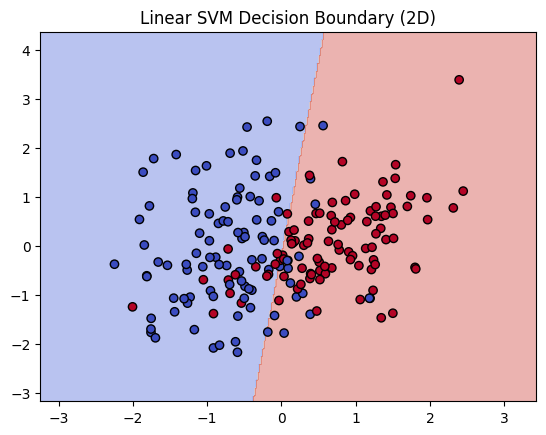

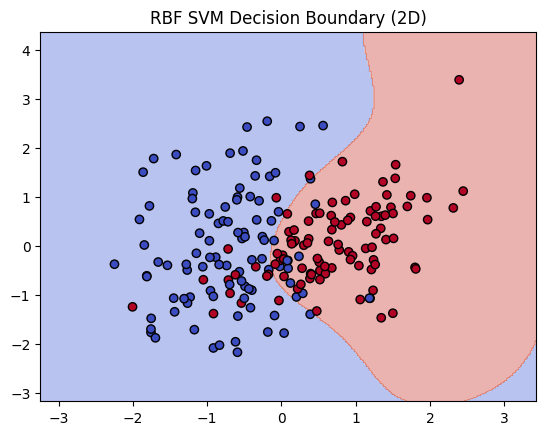

In [9]:
# Step 8: Visualization on 2D Synthetic Dataset
X_vis, y_vis = make_classification(
    n_samples=200, n_features=2, n_redundant=0, n_informative=2,
    n_clusters_per_class=1, random_state=42
)

X_vis = StandardScaler().fit_transform(X_vis)

def plot_decision_boundary(model, X, y, title):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors="k", cmap=plt.cm.coolwarm)
    plt.title(title)
    plt.show()

# Linear Decision Boundary
svm_lin_2d = SVC(kernel="linear", C=1).fit(X_vis, y_vis)
plot_decision_boundary(svm_lin_2d, X_vis, y_vis, "Linear SVM Decision Boundary (2D)")

# RBF Decision Boundary
svm_rbf_2d = SVC(kernel="rbf", C=1, gamma=0.5).fit(X_vis, y_vis)
plot_decision_boundary(svm_rbf_2d, X_vis, y_vis, "RBF SVM Decision Boundary (2D)")